<a href="https://colab.research.google.com/github/felipesora/CP1-Analise-Dados-Consumidores-Energia/blob/main/CP1_Analise_Dados_Consumidores_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Checkpoint 01: Análise de Dados de Consumidores de Energia**

Felipe Ulson Sora - RM555462

Link para download do conjunto de dados:
https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [1]:
import pandas as pd

## PARTE 1 – Exercícios iniciais com Individual Household Electric Power Consumption

1. Carregue o dataset e exiba as 10 primeiras linhas.

In [2]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=';', low_memory=False)
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.860,15.800,0.000,2.000,16.0


2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.

Global_active_power

- O que é: É a potência ativa total consumida por todos os aparelhos elétricos de uma residência ou instalação em determinado momento.

- Unidade: Geralmente em kilowatts (kW).

- Função na prática: Representa a energia que efetivamente realiza trabalho (como acender lâmpadas, ligar o chuveiro, rodar a geladeira).

- Exemplo: Se você liga um chuveiro de 2 kW e uma lâmpada de 0,1 kW, a Global_active_power mede a soma, ou seja, 2,1 kW de potência sendo usada de fato.

Global_reactive_power

- O que é: É a potência reativa total, ou seja, a energia que não realiza trabalho útil, mas que é necessária para o funcionamento de equipamentos que usam campos magnéticos, como motores, transformadores e condensadores.

- Unidade: Geralmente em kilovolt-ampere reativo (kVAR).

- Função na prática: Mantém os campos elétricos e magnéticos dentro dos aparelhos; embora não seja usada diretamente para produzir trabalho, é fundamental para o funcionamento de certos equipamentos.

- Exemplo: Um motor de geladeira consome 0,2 kW de potência reativa enquanto está ligado, para gerar o campo magnético que faz o motor girar.

Conclusão:

- Potência ativa (Global_active_power): gera trabalho útil.

- Potência reativa (Global_reactive_power): mantém os campos elétricos/magnéticos necessários, mas não realiza trabalho direto.

3. Verifique se existem valores ausentes no dataset. Quantifique-os.

In [3]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df.head()

/tmp/ipython-input-2254452357.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week
0,2006-12-16,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,Saturday
1,2006-12-16,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,Saturday
2,2006-12-16,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,Saturday
3,2006-12-16,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,Saturday
4,2006-12-16,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,Saturday


5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de Global_active_power.

In [5]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df_2007 = df[df['Date'].dt.year == 2007]
consumo_diario_medio = df_2007['Global_active_power'].mean()
print(f'A média de consumo diário de Global_active_power no ano de 2007 é de {consumo_diario_medio} kW.')

A média de consumo diário de Global_active_power no ano de 2007 é de 1.117007500924916 kW.


6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à sua escolha.

<Axes: xlabel='Time'>

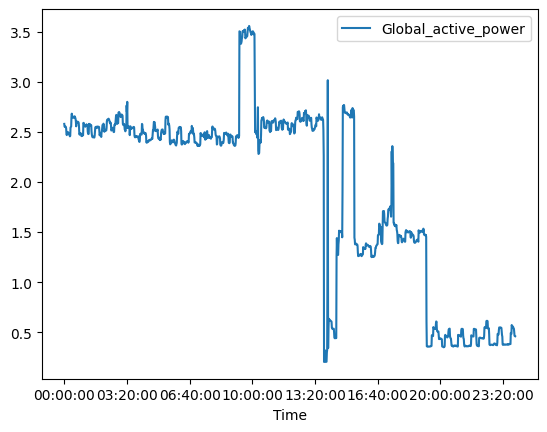

In [6]:
dia_escolhido = '2007-01-01'
df_dia_escolhido = df[df['Date'] == dia_escolhido]
df_dia_escolhido.plot(x='Time', y='Global_active_power', kind='line')

7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?


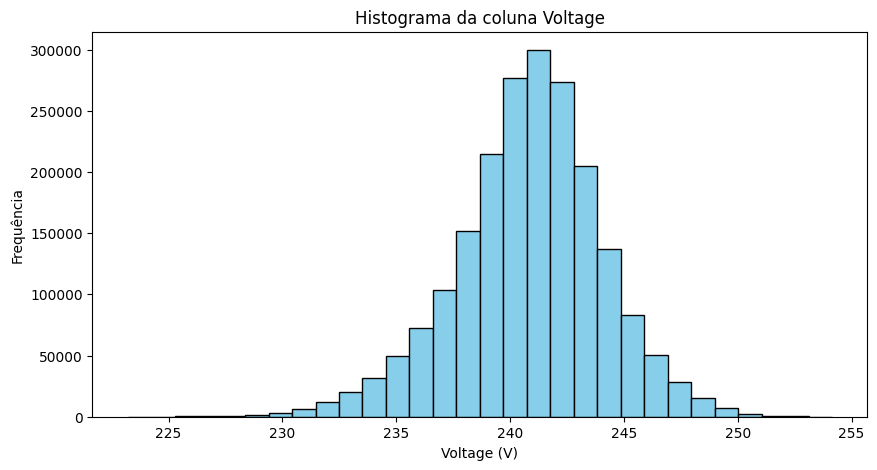

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Converte a coluna Voltage para numérico (valores inválidos viram NaN)
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# Opcional: filtra só linhas válidas
df_volt = df[df['Voltage'].notna()]

# Cria o histograma
plt.figure(figsize=(10,5))
plt.hist(df_volt['Voltage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma da coluna Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.show()

O histograma da variável Voltage, indica que a maioria dos valores de voltagem se concentra em torno de uma média, com a frequência diminuindo gradualmente à medida que os valores se afastam dessa média em ambas as direções. A distribuição parece ser simétrica, com picos e vales distribuídos de forma relativamente uniforme em torno do valor central.

8. Calcule o consumo médio por mês em todo o período disponível no dataset.

In [8]:
df['Month_Year'] = df['Date'].dt.to_period('M')
consumo_medio_por_mes = df.groupby('Month_Year')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_medio_por_mes)

Consumo médio de Global_active_power por mês:
Month_Year
2006-12    1.901295
2007-01    1.546034
2007-02    1.401084
2007-03    1.318627
2007-04    0.891189
2007-05    0.985862
2007-06    0.826814
2007-07    0.667367
2007-08    0.764186
2007-09    0.969318
2007-10    1.103911
2007-11    1.294473
2007-12    1.626474
2008-01    1.459920
2008-02    1.181384
2008-03    1.245337
2008-04    1.115972
2008-05    1.024281
2008-06    0.994096
2008-07    0.794781
2008-08    0.276488
2008-09    0.987680
2008-10    1.136768
2008-11    1.387066
2008-12    1.275189
2009-01    1.410202
2009-02    1.247568
2009-03    1.226735
2009-04    1.140690
2009-05    1.012856
2009-06    0.840756
2009-07    0.618121
2009-08    0.664619
2009-09    0.986841
2009-10    1.144486
2009-11    1.274743
2009-12    1.364421
2010-01    1.430525
2010-02    1.375855
2010-03    1.130075
2010-04    1.027295
2010-05    1.095284
2010-06    0.969615
2010-07    0.721068
2010-08    0.590778
2010-09    0.956442
2010-10    1.163399
201

9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).

In [9]:
dia_maior_consumo = df.loc[df['Global_active_power'].idxmax(), 'Date']
print(f'O dia com maior consumo de energia ativa global é {dia_maior_consumo}.')

O dia com maior consumo de energia ativa global é 2009-02-22 00:00:00.


10. Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.

In [10]:
# Compare o consumo médio de energia ativa global em dias de semana versus finais de semana.
consumo_medio_por_dia = df.groupby('Day_of_Week')['Global_active_power'].mean()
print("Consumo médio de Global_active_power por dia da semana:")
print(consumo_medio_por_dia)

Consumo médio de Global_active_power por dia da semana:
Day_of_Week
Friday       1.043394
Monday       0.999546
Saturday     1.248335
Sunday       1.220188
Thursday     0.981809
Tuesday      1.069796
Wednesday    1.082588
Name: Global_active_power, dtype: float64


11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power, Voltage e Global_intensity.

In [11]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

correlacoes = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']].corr()
print("Correlações entre as variáveis:")
print(correlacoes)

Correlações entre as variáveis:
                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   

                       Global_intensity  
Global_active_power            0.998889  
Global_reactive_power          0.266120  
Voltage                       -0.411363  
Global_intensity               1.000000  


12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.

In [12]:
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

df['Total_Sub_metering'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Total_Sub_metering'].head()

,Total_Sub_metering
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.

In [13]:
media_global_active_power = df['Global_active_power'].mean()
df_acima_media = df[df['Total_Sub_metering'] > media_global_active_power]
df_acima_media

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Month_Year,Total_Sub_metering
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,Saturday,2006-12,18.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,Saturday,2006-12,17.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,Saturday,2006-12,19.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,Saturday,2006-12,18.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,Saturday,2006-12,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2075217,2010-11-26,20:21:00,1.086,0.140,240.59,4.6,0.0,2.0,0.0,Friday,2010-11,2.0
2075222,2010-11-26,20:26:00,1.074,0.134,239.71,4.6,0.0,2.0,0.0,Friday,2010-11,2.0
2075227,2010-11-26,20:31:00,0.982,0.000,239.33,4.2,0.0,2.0,0.0,Friday,2010-11,2.0
2075234,2010-11-26,20:38:00,0.976,0.096,236.97,4.0,0.0,2.0,0.0,Friday,2010-11,2.0


14. Faça um gráfico de série temporal do Voltage para o ano de 2008.

<Axes: xlabel='Date'>

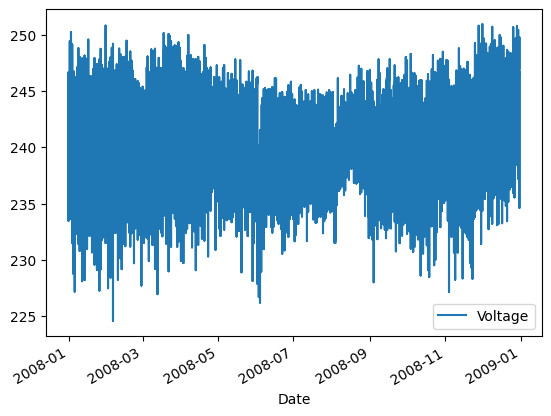

In [14]:
df_2008 = df[df['Date'].dt.year == 2008]
df_2008.plot(x='Date', y='Voltage', kind='line')

15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).

In [15]:
consumo_por_mes = df.groupby(df['Date'].dt.month)['Global_active_power'].mean()
print("Consumo médio de Global_active_power por mês:")
print(consumo_por_mes)

Consumo médio de Global_active_power por mês:
Date
1     1.462226
2     1.300431
3     1.231343
4     1.047146
5     1.029571
6     0.909148
7     0.700359
8     0.572812
9     0.975653
10    1.137141
11    1.291532
12    1.489729
Name: Global_active_power, dtype: float64


16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa.

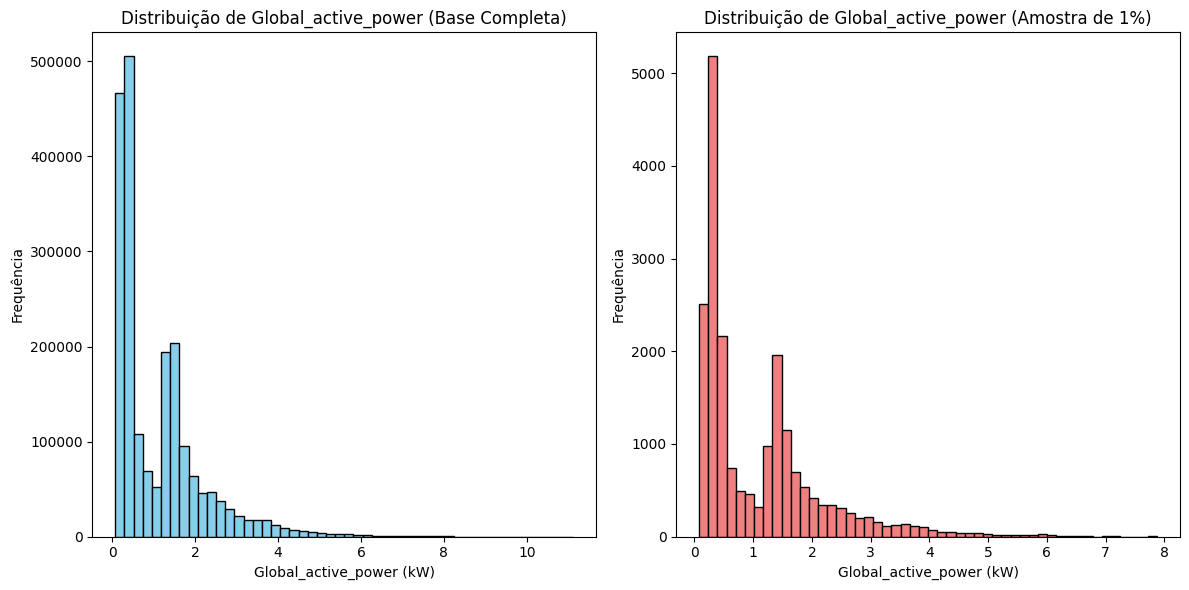

In [16]:
df_sampled = df.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Global_active_power'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição de Global_active_power (Base Completa)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df_sampled['Global_active_power'].dropna(), bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribuição de Global_active_power (Amostra de 1%)')
plt.xlabel('Global_active_power (kW)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais.

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Select the numerical columns to normalize
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day_of_Week,Month_Year,Total_Sub_metering
0,2006-12-16,17:24:00,0.374796,0.300719,0.376090,0.377593,0.0,0.0125,0.548387,Saturday,2006-12,0.134328
1,2006-12-16,17:25:00,0.478363,0.313669,0.336995,0.473029,0.0,0.0125,0.516129,Saturday,2006-12,0.126866
2,2006-12-16,17:26:00,0.479631,0.358273,0.326010,0.473029,0.0,0.0250,0.548387,Saturday,2006-12,0.141791
3,2006-12-16,17:27:00,0.480898,0.361151,0.340549,0.473029,0.0,0.0125,0.548387,Saturday,2006-12,0.134328
4,2006-12-16,17:28:00,0.325005,0.379856,0.403231,0.323651,0.0,0.0125,0.548387,Saturday,2006-12,0.134328


18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados.

In [18]:
from sklearn.cluster import KMeans
import numpy as np

df_daily = df.groupby('Date')[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Total_Sub_metering']].mean()

df_daily = df_daily.dropna()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_daily['Cluster'] = kmeans.fit_predict(df_daily)

print("Caracteristicas de cada conjunto:")
display(df_daily.groupby('Cluster').mean())

Caracteristicas de cada conjunto:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Sub_metering
Cluster,,,,,,,,
0,0.067228,0.091180,0.577298,0.068554,0.008628,0.011777,0.143050,0.045791
1,0.117315,0.088377,0.586981,0.115577,0.016466,0.020298,0.273474,0.086198
2,0.071726,0.079736,0.387392,0.074452,0.013394,0.016346,0.160400,0.055663


19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.

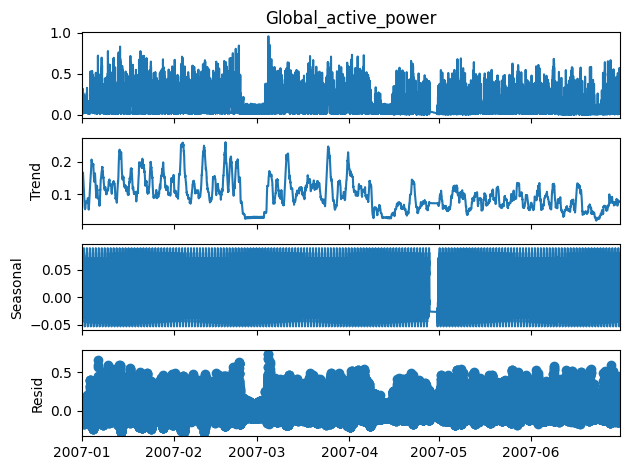

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Selecione um período de 6 meses para a análise (ajuste as datas conforme necessário)
start_date = '2007-01-01'
end_date = '2007-06-30'
df_subset = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].copy()

# Crie um índice de data/hora para a série temporal
df_subset['DateTime'] = pd.to_datetime(df_subset['Date'].astype(str) + ' ' + df_subset['Time'])
df_subset.set_index('DateTime', inplace=True)

# Remova as linhas com valores ausentes na coluna 'Global_active_power'
df_subset.dropna(subset=['Global_active_power'], inplace=True)

# Realize a decomposição aditiva
# Assumindo que a frequência dos dados é diária para este exemplo.
# Você pode precisar ajustar a frequência (period) se for diferente.
decomposition = seasonal_decompose(df_subset['Global_active_power'], model='additive', period=24*60) # 24 horas * 60 minutos = 1440 minutos em um dia

# Plote a decomposição
fig = decomposition.plot()
plt.show()

20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Preparar os dados
# Remover linhas com valores ausentes em ambas as colunas
df_reg = df.dropna(subset=['Global_active_power', 'Global_intensity']).copy()

X = df_reg[['Global_intensity']] # Variável preditora
y = df_reg['Global_active_power'] # Variável alvo

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'R-quadrado (R2): {r2}')

Erro Quadrático Médio (MSE): 2.0125188629674842e-05
R-quadrado (R2): 0.9978152308016333


## PARTE 2 – Exercícios adicionais no dataset inicial

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.

Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

In [30]:
# Converta Date e Time em índice datetime.
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])
df.set_index('DateTime', inplace=True)

# Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
df_hourly = df['Global_active_power'].resample('H').mean()

# Identifique os horários de maior consumo médio ao longo do dia.
horarios_maior_consumo = df_hourly.groupby(df_hourly.index.time).mean().sort_values(ascending=False)

print("Horários de maior consumo médio de Global_active_power:")
print(horarios_maior_consumo.head())

Horários de maior consumo médio de Global_active_power:
20:00:00    0.165044
21:00:00    0.162961
19:00:00    0.150048
07:00:00    0.129130
08:00:00    0.125379
Name: Global_active_power, dtype: float64


/tmp/ipython-input-253846886.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df['Global_active_power'].resample('H').mean()


22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [31]:
# Calcule a autocorrelação para lags de 1h, 24h e 48h
autocorr_1h = df_hourly.autocorr(lag=1)
autocorr_24h = df_hourly.autocorr(lag=24)
autocorr_48h = df_hourly.autocorr(lag=48)

print(f'Autocorrelação (Lag 1 hora): {autocorr_1h}')
print(f'Autocorrelação (Lag 24 horas): {autocorr_24h}')
print(f'Autocorrelação (Lag 48 horas): {autocorr_48h}')

Autocorrelação (Lag 1 hora): 0.713455594691645
Autocorrelação (Lag 24 horas): 0.43590722591199127
Autocorrelação (Lag 48 horas): 0.4012692620450157


Sim. A autocorrelação em 1 hora é relativamente alta, o que indica que o consumo de energia em uma hora está fortemente relacionado ao consumo da hora anterior. Isso é esperado em séries temporais de consumo de energia.

A autocorrelação em 24 horas e 48 horas também são positivas, embora menores que a de 1 hora. Isso sugere que há, sim, padrões que se repetem diariamente e, em menor grau, a cada dois dias.

23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.


In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecione as variáveis para o PCA
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df_pca = df[features].copy()

# Remova linhas com valores ausentes (PCA não lida com NaNs)
df_pca.dropna(inplace=True)

# Padronize os dados (PCA é sensível à escala das variáveis)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_pca)

# Aplique PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Crie um DataFrame com os componentes principais
df_principal_components = pd.DataFrame(data = principal_components, columns = ['principal_component_1', 'principal_component_2'])

# Analise a variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

print("Variância explicada por cada componente principal:")
print(f"Componente Principal 1: {explained_variance_ratio[0]:.4f}")
print(f"Componente Principal 2: {explained_variance_ratio[1]:.4f}")
print(f"Variância total explicada: {explained_variance_ratio.sum():.4f}")

Variância explicada por cada componente principal:
Componente Principal 1: 0.5910
Componente Principal 2: 0.2272
Variância total explicada: 0.8182


24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?


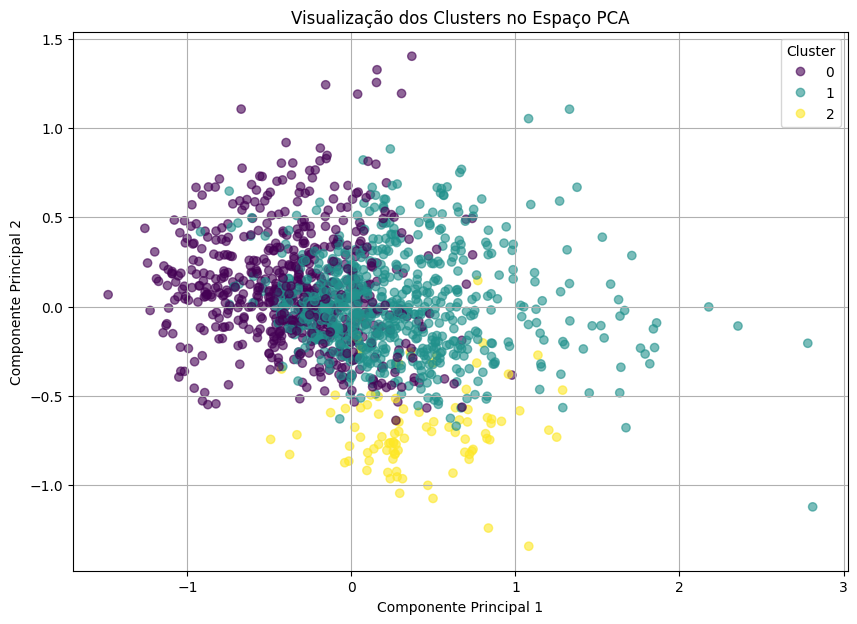

In [34]:
import matplotlib.pyplot as plt

# Certifique-se de que o índice dos componentes principais corresponde ao índice dos clusters diários
# Como PCA foi aplicado aos dados normalizados após remover NaNs, precisamos alinhar com o df_daily
# que também removeu NaNs e foi agrupado por data.
# Vamos resetar o índice de df_pca_cleaned para alinhar com df_daily após o dropna
df_pca_cleaned = df[features].dropna().copy()
df_pca_cleaned['principal_component_1'] = principal_components[:, 0]
df_pca_cleaned['principal_component_2'] = principal_components[:, 1]

# Agrupar os componentes principais pela data para corresponder ao df_daily
df_pca_daily = df_pca_cleaned.groupby(df_pca_cleaned.index.date)[['principal_component_1', 'principal_component_2']].mean()
df_pca_daily.index = pd.to_datetime(df_pca_daily.index) # Convert index to datetime

# Resetar o índice de df_daily para mesclar
df_daily_reset = df_daily.reset_index()
df_daily_reset['Date'] = pd.to_datetime(df_daily_reset['Date'])

# Mesclar os resultados do PCA diário com os clusters diários
df_clustered_pca = pd.merge(df_pca_daily, df_daily_reset[['Date', 'Cluster']], left_index=True, right_on='Date')

# Plotar os clusters no espaço PCA
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_clustered_pca['principal_component_1'], df_clustered_pca['principal_component_2'], c=df_clustered_pca['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Visualização dos Clusters no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
legend = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.grid(True)
plt.show()

Não, os grupos não se separam de forma clara

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

In [35]:
# 1. Preparar os dados
# Selecionar as colunas Global_active_power e Voltage
df_reg_poly = df[['Global_active_power', 'Voltage']].copy()

# Remover linhas com valores ausentes
df_reg_poly.dropna(inplace=True)

display(df_reg_poly.head())

,Global_active_power,Voltage
DateTime,,
2006-12-16 17:24:00,0.374796,0.376090
2006-12-16 17:25:00,0.478363,0.336995
2006-12-16 17:26:00,0.479631,0.326010
2006-12-16 17:27:00,0.480898,0.340549
2006-12-16 17:28:00,0.325005,0.403231


In [36]:
# 2. Dividir os dados
from sklearn.model_selection import train_test_split

X = df_reg_poly[['Voltage']] # Variável preditora
y = df_reg_poly['Global_active_power'] # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 1639424
Tamanho do conjunto de teste: 409856


In [38]:
# 3. Treinar modelo de regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Avaliar o modelo linear
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear) # Calculate RMSE manually
r2_linear = r2_score(y_test, y_pred_linear)

print("Resultados da Regressão Linear Simples:")
print(f"Erro Quadrático Médio (MSE): {mse_linear}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_linear}")
print(f"R-quadrado (R2): {r2_linear}")

Resultados da Regressão Linear Simples:
Erro Quadrático Médio (MSE): 0.0077423974772478235
Raiz do Erro Quadrático Médio (RMSE): 0.08799089428598747
R-quadrado (R2): 0.15949351625644748


In [40]:
# 4. Treinar modelo de regressão polinomial (grau 2)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy

# Criar features polinomiais de grau 2
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Treinar o modelo de regressão linear com features polinomiais
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Avaliar o modelo polinomial
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly) # Calculate RMSE manually
r2_poly = r2_score(y_test, y_pred_poly)

print("\nResultados da Regressão Polinomial (Grau 2):")
print(f"Erro Quadrático Médio (MSE): {mse_poly}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_poly}")
print(f"R-quadrado (R2): {r2_poly}")


Resultados da Regressão Polinomial (Grau 2):
Erro Quadrático Médio (MSE): 0.0076705731057481455
Raiz do Erro Quadrático Médio (RMSE): 0.08758180807535401
R-quadrado (R2): 0.16729069408330122


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


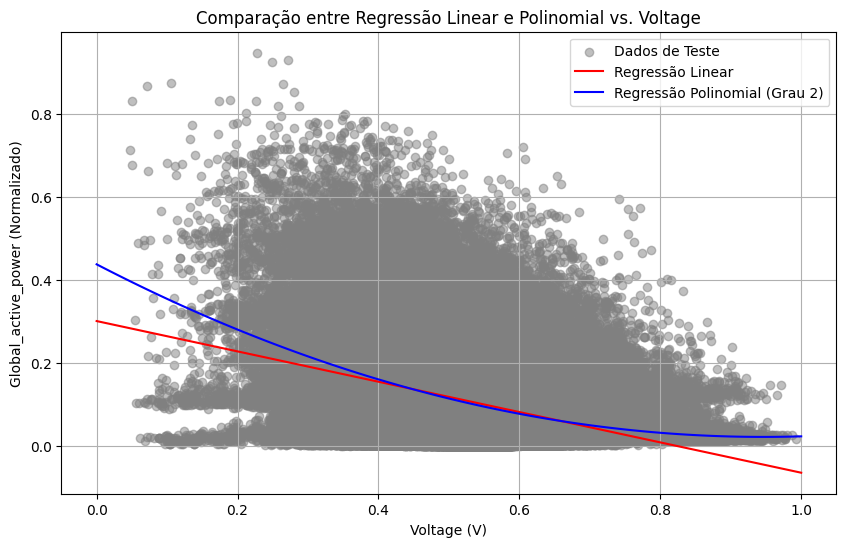

In [41]:
# 6. Visualizar os resultados
import matplotlib.pyplot as plt
import numpy as np

# Crie um array de valores de Voltage para plotar as curvas ajustadas
voltage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Previsões dos modelos para a visualização
voltage_range_poly = poly_features.transform(voltage_range)
predicted_linear = model_linear.predict(voltage_range)
predicted_poly = model_poly.predict(voltage_range_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='gray', label='Dados de Teste', alpha=0.5)
plt.plot(voltage_range, predicted_linear, color='red', label='Regressão Linear')
plt.plot(voltage_range, predicted_poly, color='blue', label='Regressão Polinomial (Grau 2)')
plt.title('Comparação entre Regressão Linear e Polinomial vs. Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Global_active_power (Normalizado)')
plt.legend()
plt.grid(True)
plt.show()

7. **Análise e comparação:**

Com base nos resultados do RMSE e no gráfico gerado, podemos comparar o desempenho dos dois modelos:

*   **RMSE:** O modelo com o menor RMSE geralmente tem um ajuste melhor aos dados.
*   **Visualização:** O gráfico mostra como cada curva de regressão se ajusta aos pontos de dados. Uma curva que segue mais de perto a tendência dos dados indica um modelo melhor.

## PARTE 3 – Novo dataset Appliances Energy Prediction